# COGS 108 - Final Project 

# Overview

*The government of each city needs to spend lots of time making the plan to decide where should they build the new parks each year. So I wonder whether I can use my knowledge in data science to give them some help by providing reasonable suggestion based on the data we have. My project aims to find out the relationship between the population density and the distribution of the parks. By making the distribution plot based on latitude and longtitude, scatter plot between the review counts and latitude(longtitude), I found that there is a correspondence between the area with high population density and area with more parks which proves that parks tend to gather around the area with high population density (eg.downtown area).*

# Name & GitHub

- Name: Mingxuan Zhao
- GitHub Username: handsomezmx
- PID: A15432337

# Research Question

*Does the population density inside a city have influence on the distribution of the parks?*

## Background and Prior Work

*In order to answer my research question, I first need to solve one important question, that is where is the area in San Diego that has more population. Since we know that the population in San Diego does not distribute evenly over the whole city. There must be some places that have more population, to be more specific, have higher population density than other places. My first reaction to this problem is that the downtown of the city would have more population. In order to prove my instinct is correct, I need to to find concrete data to support. According to the map from "Map of Population by Neighborhood in San Diego"[1], I found that it is true that population density for the downtown area is clearly higher. So next I am gonna find out the distribution of the parks in San Diego and see whether there are more parks around the Downtown area. For comparison purpose, I find out the exact range of the latitude and longtitude of the downtown area on google map[2]. From the google maps, the latitude of downtown San Diego is between 32.7 to 32.73 and the longtitude is between -117.14 to -117.17. As a result, if the distribution plots of the locations of the parks show that latitude and longtitude of the area have more parks correspond to the downtown's latitude and longtitude, then my research question could be answered in some extent.* 

References (include links):
- 1)https://statisticalatlas.com/place/California/San-Diego/Population
- 2)https://www.google.com/maps/place/Downtown+San+Diego,+San+Diego,+CA,+USA/@32.7482084,-117.1953676,12.29z/data=!4m5!3m4!1s0x80d954a96c0fb307:0xa5419af040986a6e!8m2!3d32.7167272!4d-117.1661194

# Hypothesis


*My hypothesis is that parks in San Diego tend to concentrate around downtown area which have higher population density.*

# Dataset(s)

*The ideal dataset should contain the location information of the parks so that I can find out the park on map.<br><br>
I used the San Diego Parks Yelp data in my project. It contains the information of parks in San Diego on Yelp including the rating of the parks the review counts and the sepecific location(latitude and longitude) and so on. The data set has 833 rows and 10 columns including name, address, review_count,latitude, longtitude etc. but I'm not gonna use all of them in my project.*

(Copy this information for each dataset)
- Dataset Name: yelp_SD_parks.csv
- Link to the dataset: https://www.yelp.com/developers/documentation/v3/business_reviews
- Number of observations: 833 rows, 10 columns

I plan to make the distribution plots based on latitude and longitude and scatter plots between review_count and latitude(and longitude) to show the relationship between population density and distribution of parks.



# Setup

In [10]:
## YOUR CODE HERE
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Cleaning

Describe your data cleaning steps here.

In [11]:
## YOUR CODE HERE
## import the data we are going to use
yelprate = pd.read_csv("/home/mzhao/individual_fa20/data/yelp_SD_parks.csv")
## take a look of the dataset
yelprate


,name,address,phone,id,url,rating,review_count,longitude,latitude,is_closed
0,Balboa Park,"1549 El Prado San Diego, CA 92101",1.619239e+10,9M_FW_-Ipx93I36w-_ykBg,https://www.yelp.com/biz/balboa-park-san-diego...,5.0,2105,-117.153150,32.734502,False
1,Civita Park,"7960 Civita Blvd San Diego, CA 92108",NaN,3AEHjqNrTmggA6G9VdhQfg,https://www.yelp.com/biz/civita-park-san-diego...,4.5,46,-117.147278,32.778315,False
2,Waterfront Park,"1600 Pacific Hwy San Diego, CA 92101",1.619233e+10,3unbJeYrn1RmInZGmjp80g,https://www.yelp.com/biz/waterfront-park-san-d...,4.5,242,-117.172479,32.721952,False
3,Trolley Barn Park,"Adams Ave And Florida St San Diego, CA 92116",NaN,PvHxIYrmaiFKdWUDTMDzcg,https://www.yelp.com/biz/trolley-barn-park-san...,4.5,102,-117.143789,32.762463,False
4,Bay View Park,"413 1st St Coronado, CA 92118",NaN,6IF4VB9-fkv_F-LBvG8ppQ,https://www.yelp.com/biz/bay-view-park-coronad...,5.0,42,-117.178967,32.701785,False
...,...,...,...,...,...,...,...,...,...,...
828,Del Cerro - San Diego,"San Diego, CA 92120",1.619287e+10,ggbc59hSsl6pxCGSN1QLQA,https://www.yelp.com/biz/del-cerro-san-diego-s...,4.5,12,-117.073524,32.792626,False
829,San Diego Metropolitan Transit System,"1255 Imperial Ave Ste 1000 San Diego, CA 92101",1.619238e+10,c8jhIMcwSjWqBD7S-faKYg,https://www.yelp.com/biz/san-diego-metropolita...,2.5,268,-117.153400,32.705760,False
830,Petco Park,"100 Park Blvd San Diego, CA 92101",1.619796e+10,HkgSbRLVMRHExsRkImIK5A,https://www.yelp.com/biz/petco-park-san-diego?...,4.0,1667,-117.157054,32.707246,False
831,Ann D. L'Heureux Memorial Dog Park,"2700 Carlsbad Village Dr Carlsbad, CA 92008",1.760434e+10,wYGJ65iVMi74-3TylWxY0Q,https://www.yelp.com/biz/ann-d-l-heureux-memor...,3.0,50,-117.316419,33.171137,False


In [12]:
## I am going to cut the columns that are not helpful to me.
yelprate= yelprate.drop(columns = ['phone','id'])
yelprate

,name,address,url,rating,review_count,longitude,latitude,is_closed
0,Balboa Park,"1549 El Prado San Diego, CA 92101",https://www.yelp.com/biz/balboa-park-san-diego...,5.0,2105,-117.153150,32.734502,False
1,Civita Park,"7960 Civita Blvd San Diego, CA 92108",https://www.yelp.com/biz/civita-park-san-diego...,4.5,46,-117.147278,32.778315,False
2,Waterfront Park,"1600 Pacific Hwy San Diego, CA 92101",https://www.yelp.com/biz/waterfront-park-san-d...,4.5,242,-117.172479,32.721952,False
3,Trolley Barn Park,"Adams Ave And Florida St San Diego, CA 92116",https://www.yelp.com/biz/trolley-barn-park-san...,4.5,102,-117.143789,32.762463,False
4,Bay View Park,"413 1st St Coronado, CA 92118",https://www.yelp.com/biz/bay-view-park-coronad...,5.0,42,-117.178967,32.701785,False
...,...,...,...,...,...,...,...,...
828,Del Cerro - San Diego,"San Diego, CA 92120",https://www.yelp.com/biz/del-cerro-san-diego-s...,4.5,12,-117.073524,32.792626,False
829,San Diego Metropolitan Transit System,"1255 Imperial Ave Ste 1000 San Diego, CA 92101",https://www.yelp.com/biz/san-diego-metropolita...,2.5,268,-117.153400,32.705760,False
830,Petco Park,"100 Park Blvd San Diego, CA 92101",https://www.yelp.com/biz/petco-park-san-diego?...,4.0,1667,-117.157054,32.707246,False
831,Ann D. L'Heureux Memorial Dog Park,"2700 Carlsbad Village Dr Carlsbad, CA 92008",https://www.yelp.com/biz/ann-d-l-heureux-memor...,3.0,50,-117.316419,33.171137,False


# Data Analysis & Results

Text(0, 0.5, 'frequency')

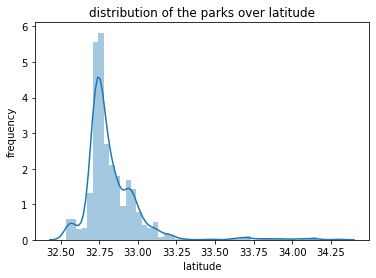

In [13]:
## take a look of the distribution of location of the park

dist1 = sns.distplot(yelprate['latitude'])
dist1.set_title('distribution of the parks over latitude')
dist1.set_ylabel('frequency')


We can see that most of the parks gather around at the latitude from 32.7 to 32.8 which exactly correspond to the area of downtown ,which has latitude between 32.7 to 32.73, and area around downtown. We can notice that there are few outliers but it won't bring too much effect.

Text(0.5, 1.0, 'scatterplot between latitude and review_count')

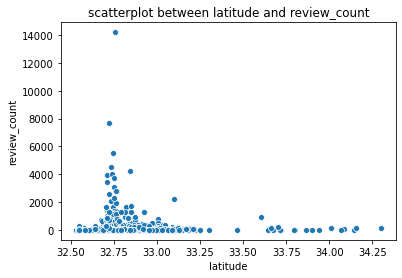

In [14]:
## let's take a look at the relationship between latitude and revoew count.
scatter1 = sns.scatterplot(y = yelprate['review_count'],x=yelprate['latitude'])
scatter1.set_title('scatterplot between latitude and review_count')

Surprisingly I found that hte scatter plot between the latitude and review_count correspond to the shape of the distribution of the parks based on latitude. I think this finding further support my hypothesis since the reason why two plots have similar shape is that there are more parks built at the place with more people which can lead to more review counts.

Include cells that describe the steps in your data analysis.

Text(0, 0.5, 'frequency')

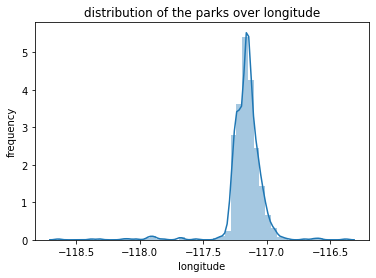

In [15]:
## take a look of the distribution of location of the park
dist2 = sns.distplot(yelprate['longitude'])
dist2.set_title('distribution of the parks over longitude')
dist2.set_ylabel('frequency')

The longtitude of the dowtown area is between -117.14 to -117.17, this perfectlt matches the peak of the distribution plot above. Since both the latitude and longtitude distribution plot correspond to the latitude and longtitude of downtown area respectively, I could say that parks tend to gather around the downtown area. (We can notice that there are few outliers but it won't bring too much effect.)

Text(0.5, 1.0, 'scatterplot between longitude and review_count')

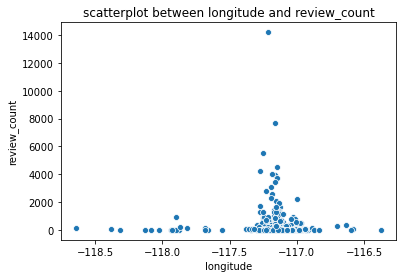

In [16]:
## let's take a look whether there is a relationship between the longitude and rating
scatter2 = sns.scatterplot(y = yelprate['review_count'],x=yelprate['longitude'])
scatter2.set_title('scatterplot between longitude and review_count')

Let's check whether the scatter plot between longtitude and review count correspond to the distribution plot above just in case the interesting correspondence relation between the scatter plot of review count and distribution plot based on the latitude is a coincidence. It turns out that the corespondence between the shapes of two plots based on longtitude still exists. 

# Ethics & Privacy

*For the privacy part, We should be careful about the information of the people who give the review on Yelp. The conclusion my analysis finds out may disclose the living area of the people who give the review since people might tend to go to the parks near their home. Even though in this dataset there is no information related to the people who give the review, we still need to keep that in mind in the similar analysis in the future.<br><br>
For the ethics part, the dataset I used is just for the parks in San Diego.In another word, the conclusion I got is all based on the data from one city. However, the conclusion I got may not be true when someone trying to apply it on other cities in the US so it might cause some bias when people want to apply the conclusion on other cities. One way to reduce this possible bias is finding out the real situation of a city and decide whether my analysis also makes sense before using conclusion I got from dataset of park in San Diego.*

# Conclusion & Discussion

Based on my analysis, I can conclude that the population of a certain area do have influence on the distribution of the parks and my hypothesis that there are more parks around downtown area is correct. My analysis first use the distribution plot to find out the latitude and longtitude of the area that have more parks and check whether this area correspond to the downtown area of San Diego by comparing the latitude and longtitude. It turns out that these two areas are highly overlapped so we can then infer that parks tend to be built at the places have more people (we proved in the background and prior work that downtown area has higher population density). I also found that the shape of the scatter plots between latitude(longtitude) and review count have similar shape as the distribution plots based on latitude(longtitude). This finding can further prove my hypothesis since the the existence of the similarity shows that more people visited and leave reviews for the parks at the area which has more park. The reason why more people visited these parks is because the population density there is higher. So we can say that population density generally reflect the locations of parks in a city(at least in San Diego).<br><br>

I think my finding is very helpful for the government when they are trying to make the city planning. Based on the population density, they can accurately build more parks at the area with higher population density to satisfy more people's needs.
<br><br>
One limitations I met during the project is that I wonder whether the conclusion I got from San Diego is also true in other cities in the US. I think I will repeat this analysis in more cities in the US to avoid this is just a coincidence in the future.